In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('co2_emissions.csv')


dataf = data.sort_values(by= '2021', ascending= False).head(6)
data_top = dataf.drop(0)

years = ['1990','2005','2017','2021']
countries = ['China','United States','European Union','India','Russia']

year_1990 = data_top.loc[:, '1990']
year_2005 = data_top.loc[:, '2005']
year_2017 = data_top.loc[:, '2017']
year_2021 = data_top.loc[:, '2021']




C:\Users\Giova\AppData\Local\Temp\ipykernel_12056\1004960340.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


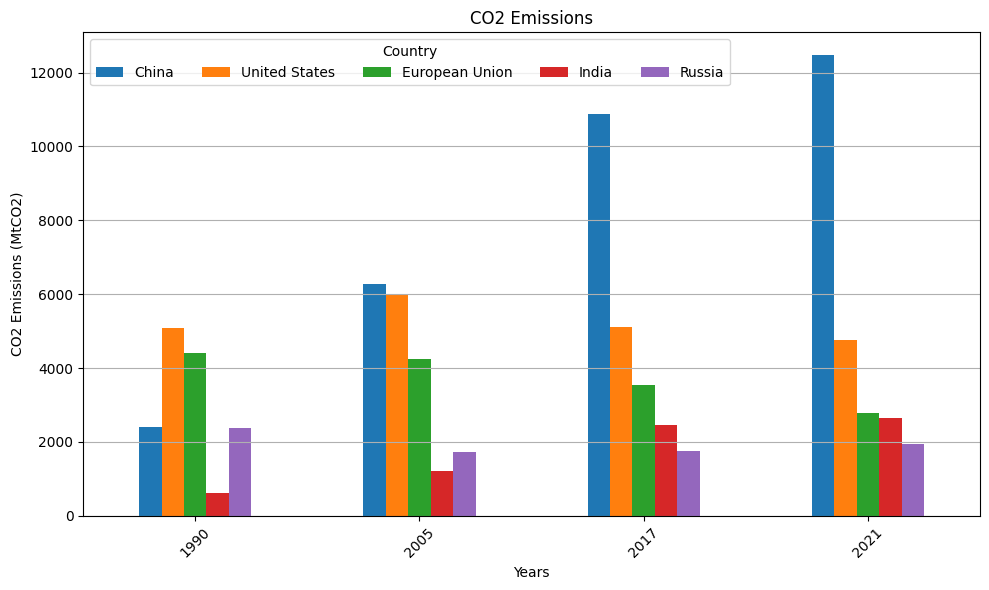

In [2]:
# Graph 1: CO2 of the bigger countries

data_top.set_index(['Country'], inplace=True)

data_t = data_top.transpose()

#PLOTINGGGG
ax = data_t.plot(kind='bar', figsize=(10, 6))

plt.title('CO2 Emissions')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions (MtCO2)')

plt.xticks(rotation=45)
plt.legend(title='Country',ncol=5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

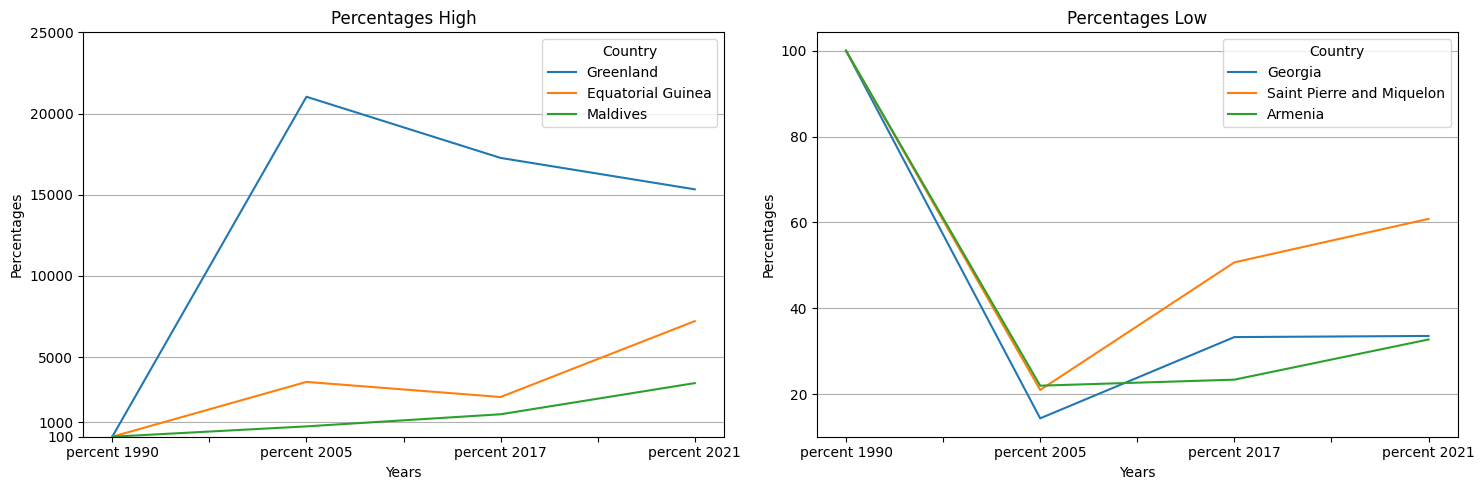

In [3]:
# Graph 2: worst and best changers

data['percent 1990'] = 100
data['percent 2005'] = data.loc[:,'2005'] / data.loc[:,'1990'] * 100
data['percent 2017'] = data.loc[:,'2017'] / data.loc[:,'1990'] * 100
data['percent 2021'] = data.loc[:,'2021'] / data.loc[:,'1990'] * 100

#Percentages based on 2005 HIGH

data_percent_high = data.sort_values(by= 'percent 2005',ascending=False).head(3)
columns_to_use_high= [data_percent_high.columns[0]] + list(data_percent_high.columns[-4:])
data_to_plot = data_percent_high[columns_to_use_high]
data_to_plot.set_index(['Country'], inplace=True)

data_t_percent_high = data_to_plot.transpose()

#Percentages based on 2005 LOW
data_percent_low = data.sort_values(by= 'percent 2005',ascending=True).head(3)
columns_to_use_low= [data_percent_low.columns[0]] + list(data_percent_low.columns[-4:])
data_to_plot = data_percent_low[columns_to_use_low]
data_to_plot.set_index(['Country'], inplace=True)

data_t_percent_low = data_to_plot.transpose()

#PLOTTINGGGGG
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1
data_t_percent_high.plot(kind='line', ax=axs[0])
axs[0].legend(title='Country', ncol=1)
axs[0].set_title('Percentages High')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Percentages')
axs[0].set_ylim([100, None])
axs[0].set_yticks([100,1000,5000,10000,15000,20000,25000])
axs[0].grid(axis='y')

# Chart 2
data_t_percent_low.plot(kind='line', ax=axs[1])
axs[1].legend(title='Country', ncol=1)
axs[1].set_title('Percentages Low')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Percentages')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()



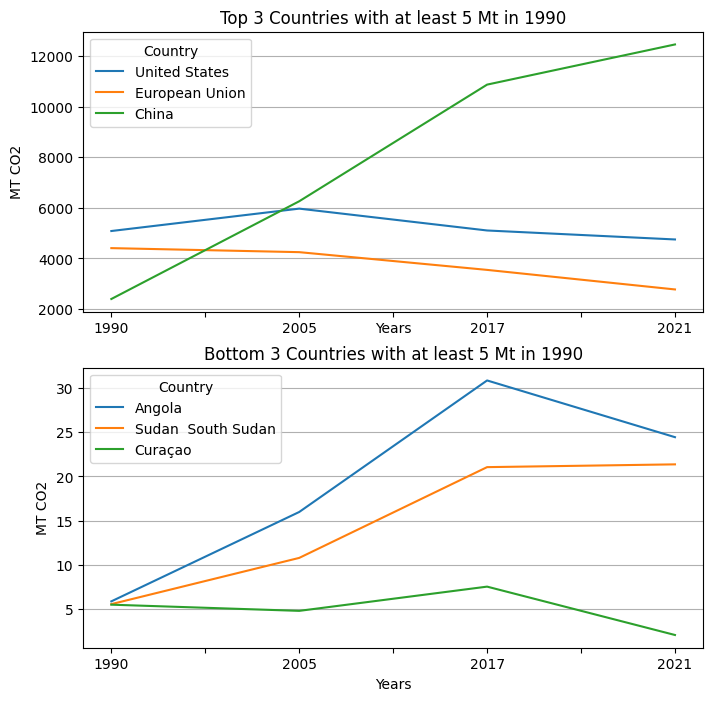

<Figure size 640x480 with 0 Axes>

In [4]:
# Graph 3: Top and Bottom 3 with atleast 5.mt in 1990
sorted_data = data[data['1990'] >= 5.0]

#Drop last 4 Columns
cols_to_drop = sorted_data.columns[-4:]
sorted_data = sorted_data.drop(columns=cols_to_drop)

#Sorted_data HEAD // Drop the first 3 rows beacuse they are not countries ( World)
sorted_data_head = sorted_data.sort_values(by= '1990',ascending=False).head(4)
sorted_data_head = sorted_data_head.drop(0)

#Sorted_data TAIL
sorted_data_tail = sorted_data.sort_values(by= '1990',ascending=False).tail(3)

# Set INDEX and TRANSPOSE HEAD
sorted_data_head.set_index(['Country'], inplace=True)
data_datat_head = sorted_data_head.transpose()

# Set INDEX and TRANSPOSE TAIL
sorted_data_tail.set_index(['Country'], inplace=True)
data_datat_tail = sorted_data_tail.transpose()

#PLOTTINGGGGG
fig, axs = plt.subplots(2, figsize=(8, 8))

# Plot the first DataFrame
data_datat_head.plot(kind='line', ax=axs[0])
axs[0].set_title('Top 3 Countries with at least 5 Mt in 1990') 
axs[0].set_xlabel('Years', labelpad=-10)
axs[0].set_ylabel('MT CO2')
axs[0].grid(axis='y')

# Plot the second DataFrame
data_datat_tail.plot(kind='line', ax=axs[1])
axs[1].set_title('Bottom 3 Countries with at least 5 Mt in 1990')
axs[1].set_title('Bottom 3 Countries with at least 5 Mt in 1990') 
axs[1].set_xlabel('Years')
axs[1].set_ylabel('MT CO2')
axs[1].grid(axis='y')

# Display the plot

plt.show()
plt.tight_layout()

